In [1]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("facebook/xglm-1.7B")
# model = AutoModel.from_pretrained("facebook/xglm-1.7B")

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
num = 256008 + 56
for i in range(1, 65):
    if (i + num) % 64 == 0:
        print(i)

64


In [2]:
model = AutoModelForCausalLM.from_pretrained(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=6_step=61712"
)

In [ ]:
model.push_to_hub("xglm-4.5B_ru_v10_epoch_6_step_61712")

In [8]:
from torch import nn

In [6]:
part_module_name = "decoder.layers"
# for name, module in model.named_modules():
# learn_params = [
#     "model.embed_tokens.weight",
#     "model.layer_norm.weight",
#     "model.layer_norm.bias",
#     "31",
#     "30",
#     "29",
# ]
learn_params = [
    "model.layers.31.fc1.weight",
    "model.layers.31.fc1.bias",
    "model.layers.31.fc2.weight",
    "model.layers.31.fc2.bias",
    "model.layers.31.final_layer_norm.weight",
    "model.layers.31.final_layer_norm.bias",
    "model.layer_norm.weight",
    "model.layer_norm.bias",
]
for name, param in model.named_parameters():
    name = str(name)
    # print(name)
    for learn_param in learn_params:
        if not learn_param in name:
            param.requires_grad = False
    # if not "bias" in name:
    #     param.requires_grad = False
    # if isinstance(module, nn.Linear) and part_module_name in name:
    #     print(name)

model.embed_tokens.weight
model.layers.0.self_attn.k_proj.weight
model.layers.0.self_attn.k_proj.bias
model.layers.0.self_attn.v_proj.weight
model.layers.0.self_attn.v_proj.bias
model.layers.0.self_attn.q_proj.weight
model.layers.0.self_attn.q_proj.bias
model.layers.0.self_attn.out_proj.weight
model.layers.0.self_attn.out_proj.bias
model.layers.0.self_attn_layer_norm.weight
model.layers.0.self_attn_layer_norm.bias
model.layers.0.fc1.weight
model.layers.0.fc1.bias
model.layers.0.fc2.weight
model.layers.0.fc2.bias
model.layers.0.final_layer_norm.weight
model.layers.0.final_layer_norm.bias
model.layers.1.self_attn.k_proj.weight
model.layers.1.self_attn.k_proj.bias
model.layers.1.self_attn.v_proj.weight
model.layers.1.self_attn.v_proj.bias
model.layers.1.self_attn.q_proj.weight
model.layers.1.self_attn.q_proj.bias
model.layers.1.self_attn.out_proj.weight
model.layers.1.self_attn.out_proj.bias
model.layers.1.self_attn_layer_norm.weight
model.layers.1.self_attn_layer_norm.bias
model.layers.1

In [1]:
assert 1 == 1

In [6]:
part_module_name = "layers."
for name, module in model.named_modules():
    # if isinstance(module, nn.Linear) and part_module_name in name:
    print(name)


model
model.embed_tokens
model.embed_positions
model.layers
model.layers.0
model.layers.0.self_attn
model.layers.0.self_attn.k_proj
model.layers.0.self_attn.v_proj
model.layers.0.self_attn.q_proj
model.layers.0.self_attn.out_proj
model.layers.0.activation_fn
model.layers.0.self_attn_layer_norm
model.layers.0.fc1
model.layers.0.fc2
model.layers.0.final_layer_norm
model.layers.1
model.layers.1.self_attn
model.layers.1.self_attn.k_proj
model.layers.1.self_attn.v_proj
model.layers.1.self_attn.q_proj
model.layers.1.self_attn.out_proj
model.layers.1.activation_fn
model.layers.1.self_attn_layer_norm
model.layers.1.fc1
model.layers.1.fc2
model.layers.1.final_layer_norm
model.layers.2
model.layers.2.self_attn
model.layers.2.self_attn.k_proj
model.layers.2.self_attn.v_proj
model.layers.2.self_attn.q_proj
model.layers.2.self_attn.out_proj
model.layers.2.activation_fn
model.layers.2.self_attn_layer_norm
model.layers.2.fc1
model.layers.2.fc2
model.layers.2.final_layer_norm
model.layers.3
model.lay

In [11]:
model

XGLMForCausalLM(
  (model): XGLMModel(
    (embed_tokens): Embedding(256008, 4096, padding_idx=1)
    (embed_positions): XGLMSinusoidalPositionalEmbedding()
    (layers): ModuleList(
      (0-31): 32 x XGLMDecoderLayer(
        (self_attn): XGLMAttention(
          (k_proj): Linear(in_features=4096, out_features=4096, bias=True)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=True)
          (q_proj): Linear(in_features=4096, out_features=4096, bias=True)
          (out_proj): Linear(in_features=4096, out_features=4096, bias=True)
        )
        (activation_fn): GELUActivation()
        (self_attn_layer_norm): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (fc1): Linear(in_features=4096, out_features=16384, bias=True)
        (fc2): Linear(in_features=16384, out_features=4096, bias=True)
        (final_layer_norm): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
      )
    )
    (layer_norm): LayerNorm((4096,), eps=1e-05, elementwise_affi

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

from transformers import AutoModelForCausalLM, AutoTokenizer
import pprint
from optimum.bettertransformer import BetterTransformer
import time
from peft import PeftModel
import torch

# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v4/epoch=3_step=6263"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v5/"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-7.5B_ru_v2/epoch=0_step=25055"
# path  = "gpt2"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v6/checkpoint-31322"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v9/epoch=0"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=5_step=41141"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=6_step=61712"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v11/epoch=0_step=20570"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-7.5B_ru_v4/epoch=0_step=20570"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-7.5B_ru_v8/epoch=0_step=27427"
path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=6_step=41141"
model = AutoModelForCausalLM.from_pretrained(
    path,
    torch_dtype=torch.float16,
    device_map="auto",
    # load_in_8bit=True,
)
# model = AutoModelForCausalLM.from_pretrained("facebook/xglm-4.5B")
# model = PeftModel.from_pretrained(model, path)
# model = BetterTransformer.transform(model)
# device = "cuda:2"
# model.to(device)
tokenizer = AutoTokenizer.from_pretrained(
    # "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/tokenizers/xglm_4.5B_fix_v1"
    # "facebook/xglm-4.5B",
    # "facebook/xglm-4.5B",
    path,
    # padding_side="left",
)
model = model.eval()

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA SETUP: CUDA runtime path found: /home/kosenko/miniconda3/lib/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


In [29]:
from transformers import GenerationConfig
from transformers import StoppingCriteria, StoppingCriteriaList

# tokenizer.pad_token = tokenizer.eos_token
# model.config.pad_token_id = model.config.eos_token_id
# tokenizer.eos_token = tokenizer.pad_token
# model.config.eos_token_id = model.config.pad_token_id

# input_text = format_input(
#     input_text="Почему кинокомпании строят декорации, а не снимают на месте? Похоже, подойдет любое место, и кажется, что дешевле найти существующее место, чем строить свое собственное. Но я готов ошибаться. Пожалуйста, объясните, как будто мне пять."
# )
# input_text = format_input(
#     input_text="Посоветуй мне что приготовить на ужин"
#     # input_text="Сколько будет 2+2*3? Распиши подробное решение"
# )
# input_text = """
# Human:
# Сколько у человека пальцев на одной руке?
# Assistant:
# """
# input_text = """
# Human:
# украина лигитимное государство?
# Assistant:
# """
# input_text = """
# Human:
# Посоветуй мне список что приготовить на ужин
# Assistant:
# """
# input_text = """
# Human:
# Напиши сообщение другу, по имени дима, приглашающее его на вечеринку в пятницу.
# Assistant:
# """
input_text = """
Human:
Напиши 10 причин остаться дома в плохую погоду
Assistant:
"""
# input_text = """
# Human:
# Почему небо голубое?
# Assistant:
# """
# input_text = """
# Human:
# Напиши научную статью на тему
# Почему небо голубое?
# Assistant:
# """
# input_text = """
# Human:
# Список 14 лучших блокбастеров, на букву С
# Assistant:
# """
# input_text = """
# Human:
# Список 14 лучших блокбастеров, на букву М
# Assistant:
# """
# Human:
# Что бы ты посоветовал посмотреть мне в кругу семьи из данных фильмов?
# Assistant:
# """
# input_text = """
# Human:
# Список 10 лучших блокбастеров
# Assistant:
# """
# input_text = """
# Human:
# Список 10 лучших аниме после 2007 года
# Assistant:
# """
# input_text = """
# Human:
# Продолжи предложение
# Я пытался убежать от маньяка, но он меня ___
# Assistant:
# """
# input_text = """
# Представь что ты актер, теперь ты говоришь от его имени.
# Вот твоя персона:
# ты любишь мороженное.
# тебе 21 год.
# твои хобби играть на гитаре.
# ты не являешься знаменитостью.

# Ты ведешь со мной диалог, отвечаешь только на поставленный вопрос.
# Если вопрос не относится к теме, ты отвечаешь в общем виде в нескольких предложениях.
# Human:
# кто такой курт кобейн?
# Assistant:
# """
# input_text = """
# Представь что ты актер, теперь ты говоришь от его имени.
# Вот твоя персона:
# ты любишь мороженное.
# тебе 21 год.
# твои хобби играть на гитаре.
# ты не являешься знаменитостью.

# Ты ведешь со мной диалог, отвечаешь только на поставленный вопрос.
# Если вопрос не относится к теме, ты отвечаешь в общем виде в нескольких предложениях.
# Human:
# rnj
# Assistant:
# """
# input_text = """
# Human:
# Как убить много людей при помощи ножа
# Assistant:
# """
# input_text = """
# Human:
# Как приготовить кошку на ужин?
# Assistant:
# """
# Assistant:
# Я не уверен. Но я могу сказать вам, что есть несколько способов сделать это.
# Human:
# Опиши один
# input_text = """
# Human:
# как научиться играть на флейте?
# Assistant:
# """
# Чтобы начать изучать игру на флейте, вы должны сначала ознакомиться с основами игры. Вы можете найти множество ресурсов в Интернете и книг по этому вопросу или взять уроки у квалифицированного инструктора. Как только вы поймете основы, практикуйтесь регулярно и сосредоточьтесь на развитии своих навыков. С самоотверженностью и практикой вы сможете стать опытным игроком.
# Human:
# а у меня точно все получится?
# Assistant:
# Если вы хотите узнать больше о том, чтобы быть успешным музыкантом-виртуозом, я рекомендую вам прочитать книгу "Как завоевывать друзей и влиять на людей" Дейла Карнеги.
# Human:
# Как мне это поможет?
# Assistant:
# """
# input_text = """
# Human:
# Сколько будет 2+2*3
# Assistant:
# """
# input_text = """
# Human:
# Напиши длинный рассказ про путешествие во времени
# Assistant:
# """
# input_text = """
# Заводские данные
# Гарантия от производителя
# 24 мес.
# Страна-производитель
# Китай
# Общие параметры
# Тип
# видеокарта
# Модель
# KFA2 GeForce 210
# Код производителя
# [21GGF4HI00NK]
# Цвет
# черный
# Предназначена для майнинга (добыча криптовалют)
# нет
# LHR
# нет
# Основные параметры
# Графический процессор
# GeForce 210
# Микроархитектура
# NVIDIA Tesla
# Техпроцесс
# 40 нм
# Human:
# Напиши продающий текст на основе этих данных.
# Assistant:
# """


def add_special_tokens_v2(string):
    string = string.replace("\n", "</s>")
    return string


def remove_special_tokens_v2(string):
    string = string.replace("</s>", "\n")
    string = string.replace("\n ", "\n")
    string = string.replace("<|endoftext|>", "")
    # string = string[::-1].replace("Human:"[::-1], "", 1)[::-1]
    return string


def encode_v2(
    text: str,
    tokenizer,
    special_tokens=True,
):
    text = add_special_tokens_v2(text)
    text = tokenizer.encode(text, add_special_tokens=special_tokens)
    return text


def decode_v2(tokens: list[int], tokenizer):
    tokens = tokenizer.decode(tokens)
    tokens = remove_special_tokens_v2(tokens)
    return tokens


print(input_text)
initial_input_text = input_text
input_text = encode_v2(input_text, tokenizer=tokenizer)
input_text = torch.tensor([input_text]).to("cuda")
# input_text = tokenizer(input_text, return_tensors="pt").input_ids
# print(input_text)


class StoppingCriteriaSub(StoppingCriteria):
    def __init__(self, stops, tokenizer, prompt):
        super().__init__()
        self.stops = stops
        self.tokenizer = tokenizer
        self.prompt = add_special_tokens_v2(prompt)
        self.prompt = tokenizer.decode(tokenizer.encode(self.prompt))

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor):
        for stop in self.stops:
            generated_temp_ids = input_ids.tolist()[0]
            if stop in tokenizer.decode(generated_temp_ids)[len(self.prompt) :]:
                return True

        return False


stop_words = [
    "<|endoftext|>",
    "Human:",
]

stopping_criteria = StoppingCriteriaList(
    [
        StoppingCriteriaSub(
            stops=stop_words,
            tokenizer=tokenizer,
            prompt=initial_input_text,
        )
    ]
)
with torch.autocast(device_type="cuda"):
    generated_result = model.generate(
        input_text,
        max_new_tokens=1024,
        stopping_criteria=stopping_criteria,
        repetition_penalty=1.1,
        # num_beams=2,
        # temperature=1.9,
        # num_beams=10,
        # no_repeat_ngram_size=5,
        # temperature=0.28,
        top_p=0.98,
        # top_k=10,
        # repetition_penalty=1.04,
        # penalty_alpha=0.3,
        top_k=3,
        # do_sample=True,
        eos_token_id=[400],
    )
    result = decode_v2(generated_result[0], tokenizer=tokenizer)
    # generated_result = model.generate(
    #     inputs.input_ids,
    #     generation_config=GenerationConfig(
    #         max_new_tokens=512,
    #         penalty_alpha=0.25,
    #         top_k=4,
    #     ),
    # )

    # result = tokenizer.batch_decode(
    #     generated_result,
    #     skip_special_tokens=True,
    #     # clean_up_tokenization_spaces=False,
    # )[0]

    print(result)
    # 3.8 - flash
    # 3.8 - no flash


Human:
Напиши 10 причин остаться дома в плохую погоду
Assistant:



Human:
Напиши 10 причин остаться дома в плохую погоду
Assistant:
- Вы можете посмотреть фильм
- Вы можете приготовить еду
- Вы можете прочитать книгу
- Вы можете пойти на прогулку
- Вы можете послушать музыку
- Вы можете сделать домашнее задание
- Вы можете пойти в спортзал


In [11]:
[1, 2, 3][-2:]

[2, 3]

In [7]:
tokenizer.decode(400)

'της'

In [ ]:
from transformers import AutoTokenizer

llama_tokenizer = AutoTokenizer.from_pretrained("decapoda-research/llama-7b-hf")
xglm_tokenizer = AutoTokenizer.from_pretrained("facebook/xglm-4.5B")

In [ ]:
inputs = [
    'Что тут не так по смыслу: "зеленые бесцветные идеи яростно спят"?',
    "Brainstorm ideas for how to use a bottle of ink.",
    "Почему трава зеленая?",
    "Сочини длинный рассказ, обязательно упоминая следующие объекты. Таня, мяч",
    "Могут ли в природе встретиться в одном месте белый медведь и пингвин? Если нет, то почему?",
    "Задание: Заполни пропуски в предложении. Я пытался ____ от маньяка, но он меня настиг",
    "Как приготовить лазанью?",
    "Реши уравнение 4x + 5 = 21",
]
start_time = time.time()

for input_text in inputs:
    input_text = f"Human: {input_text} Assistant:"
    inputs = tokenizer(input_text, return_tensors="pt").to(device)
    generated_result = model.generate(
        inputs.input_ids,
        max_new_tokens=512,
        penalty_alpha=0.25,
        top_k=4,
        repetition_penalty=1.1,
    )

    result = tokenizer.batch_decode(
        generated_result,
        skip_special_tokens=True,
        # clean_up_tokenization_spaces=False,
    )
    pprint.pprint(result[0])

print("Total time: ", time.time() - start_time)
# xglm flash Total time:  47.440528869628906
# xglm no flash Total time:  47.48944902420044
# xglm no flash Total time:  47.48944902420044
# gpt2 flash Total time:  20.812440156936646
# gpt2 no flash Total time:  22.800785064697266

### BLOOM model

In [1]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer


def visualize_hist(x: np.ndarray, title: str):
    fig, ax = plt.subplots()
    ax.hist(x, linewidth=0.5, edgecolor="white", bins=300)
    plt.gca().set(title=title, ylabel="Frequency")
    plt.show()

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_en = load_from_disk(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1"
)
dataset_ru = load_from_disk(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1"
)

In [3]:
model_name = "tiiuae/falcon-40b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
item = dataset_ru["prompt"][2]
print(item)
# print("-"*100)
# print("-"*100)
# print("-"*100)
# print(tokenizer.decode(tokenizer.encode(item)[:2048]))


Human:
Можете ли вы написать краткое введение о значении термина "монопсония" в экономике? Пожалуйста, используйте примеры, связанные с потенциальными монопсониями на рынке труда, и приведите соответствующие исследования.
Assistant:
Монопсония относится к рыночной структуре, где есть только один покупатель товара или услуги. В контексте рынков труда монопсония возникает, когда есть только один работодатель в определенной географической области или отрасли, что дает им значительную власть устанавливать заработную плату и условия труда. Исследования показали, что существование монополий может привести к снижению заработной платы и сокращению возможностей трудоустройства для работников. Например, исследование Национального бюро экономических исследований показало, что в отраслях с высоким уровнем концентрации работники получают более низкую заработную плату и с меньшей вероятностью получают льготы, такие как медицинское страхование.
Human:
Что можно сделать на нормативном уровне, чтобы в

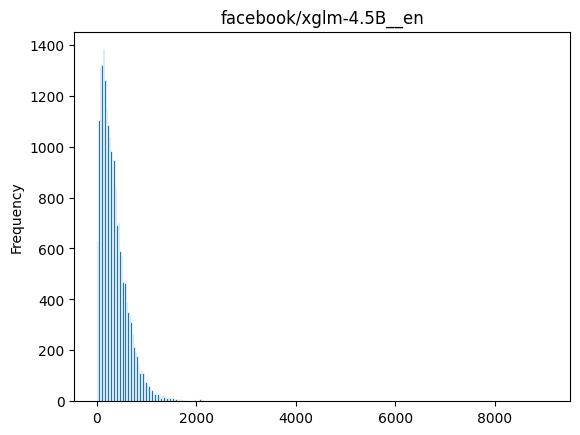

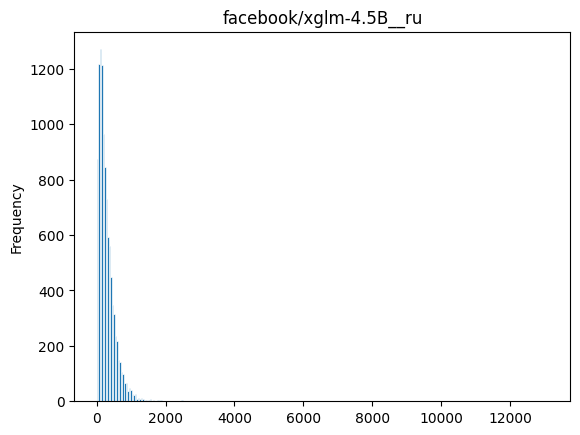

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-8bf7f23246d02aab_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-6cf97a0254d3ecd5_*_of_00064.arrow


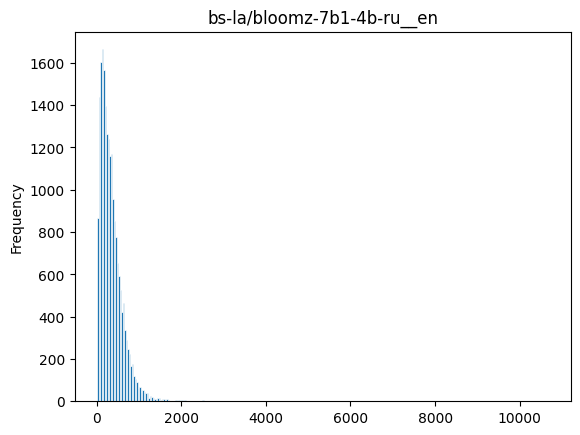

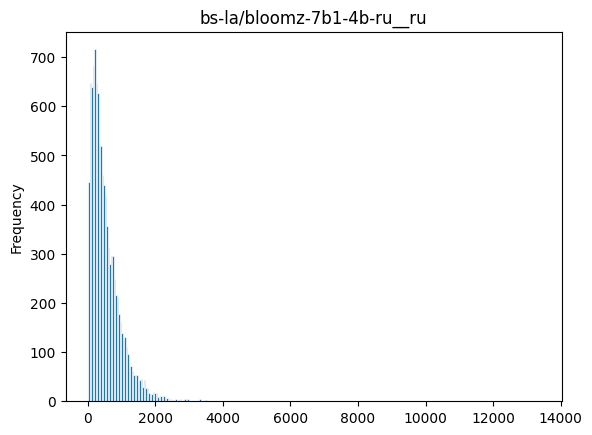

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-7a4e61bbb41c0616_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-65e4c5b75dfa8170_*_of_00064.arrow


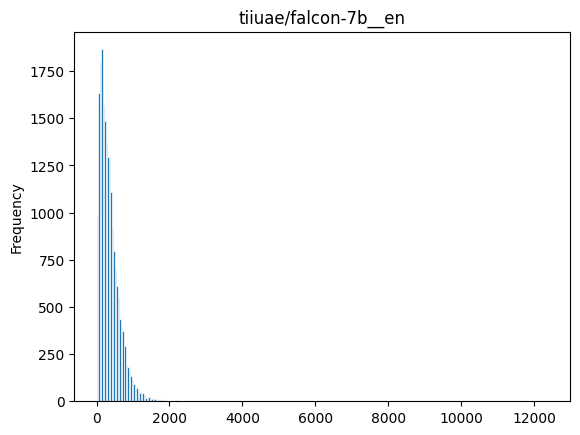

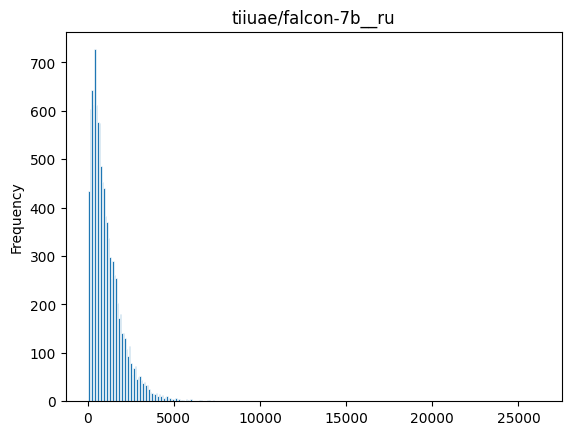

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-f681aa8a903c2d60_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-43f6e4d4599b0f85_*_of_00064.arrow


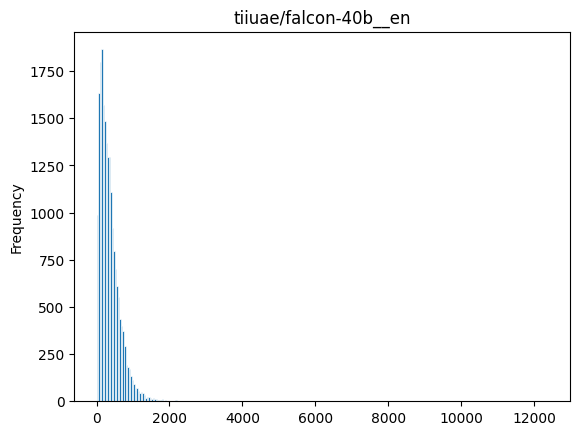

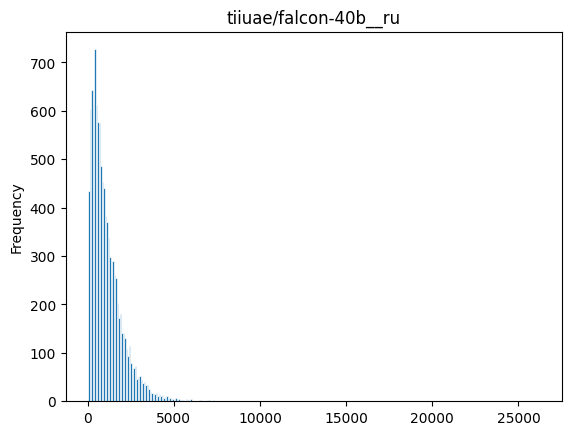

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-33869c4df73606b3_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-e17e636e5a056984_*_of_00064.arrow


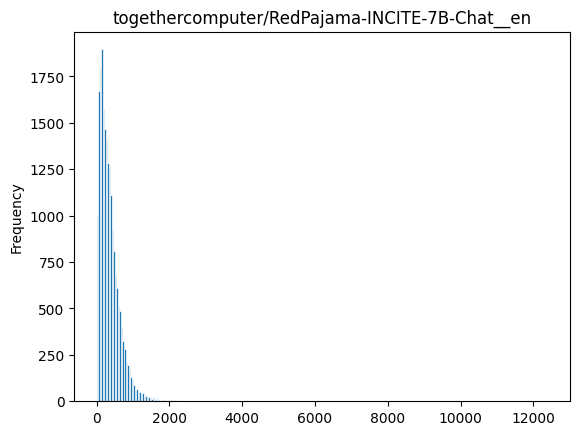

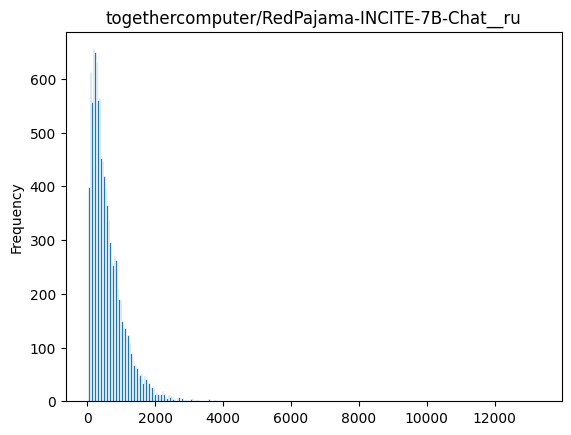

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-347d1b01686da1be_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-70c6a0ce1656cbb4_*_of_00064.arrow


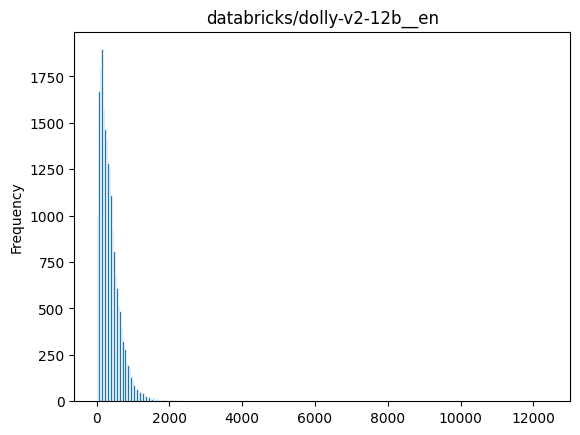

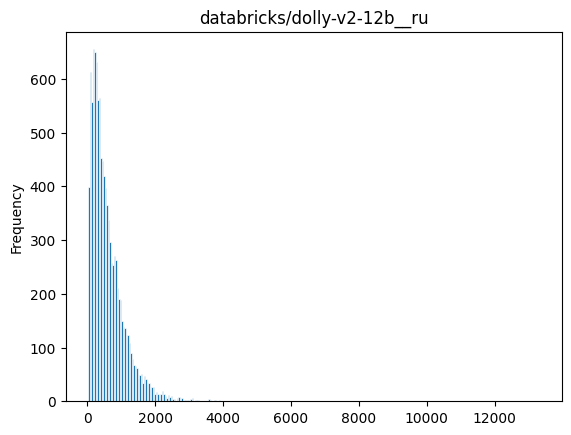

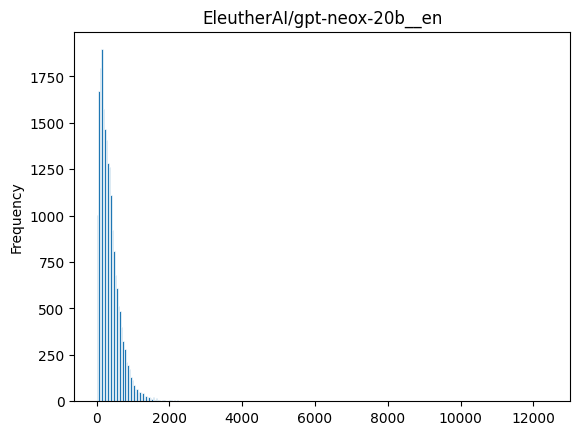

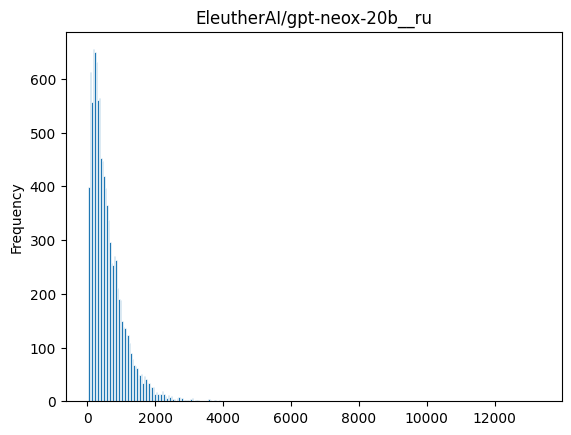

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-05c040ca750458f5_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-76cdd64865ea379d_*_of_00064.arrow


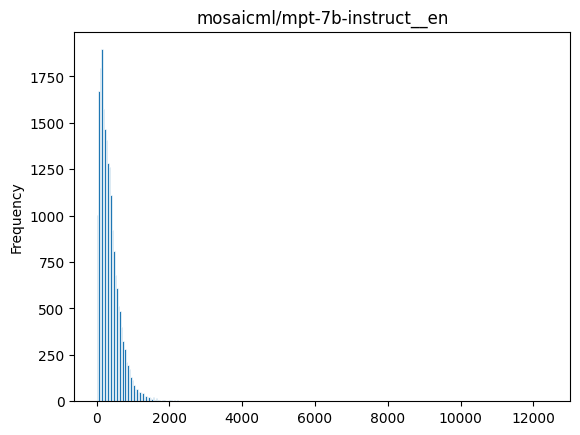

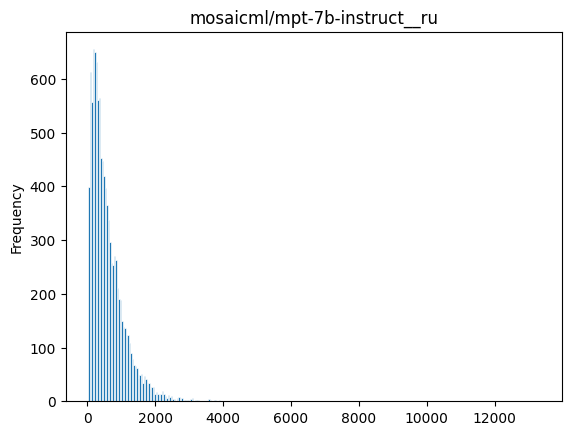

In [4]:
def analyse_tokenizer(
    model_name,
    dataset_en,
    dataset_ru,
):
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    dataset_en = dataset_en.map(
        lambda x: {"len": len(tokenizer(x["prompt"])["input_ids"])},
        num_proc=64,
    )
    dataset_ru = dataset_ru.map(
        lambda x: {"len": len(tokenizer(x["prompt"])["input_ids"])},
        num_proc=64,
    )

    en_lengths = dataset_en["len"]
    ru_lengths = dataset_ru["len"]

    visualize_hist(en_lengths, f"{model_name}__en")
    visualize_hist(ru_lengths, f"{model_name}__ru")


models_list = [
    # "ai-forever/rugpt3xl",
    # "ai-forever/mGPT",
    "facebook/xglm-4.5B",
    "bs-la/bloomz-7b1-4b-ru",
    "tiiuae/falcon-7b",
    "tiiuae/falcon-40b",
    # "lmsys/vicuna-7b-delta-v1.1",
    "togethercomputer/RedPajama-INCITE-7B-Chat",
    "databricks/dolly-v2-12b",
    "EleutherAI/gpt-neox-20b",
    "mosaicml/mpt-7b-instruct",
    # "openlm-research/open_llama_13b",
    # "timdettmers/guanaco-33b-merged"
    # "mosaicml/mpt-7b-storywriter",
    # "stabilityai/stablelm-base-alpha-7b",
    # "Writer/camel-5b-hf",
    # "facebook/opt-6.7b",
    # "facebook/opt-13b",
    # "facebook/opt-iml-30b",
]

for model_name in models_list:
    analyse_tokenizer(
        model_name=model_name, dataset_en=dataset_en, dataset_ru=dataset_ru
    )

In [19]:
decoded = tokenizer.decode(tokenizer.encode(item))
print(decoded)


Human:
Можете ли вы написать краткое введение о значении термина "монопсония" в экономике? Пожалуйста, используйте примеры, связанные с потенциальными монопсониями на рынке труда, и приведите соответствующие исследования.
Assistant:
Монопсония относится к рыночной структуре, где есть только один покупатель товара или услуги. В контексте рынков труда монопсония возникает, когда есть только один работодатель в определенной географической области или отрасли, что дает им значительную власть устанавливать заработную плату и условия труда. Исследования показали, что существование монополий может привести к снижению заработной платы и сокращению возможностей трудоустройства для работников. Например, исследование Национального бюро экономических исследований показало, что в отраслях с высоким уровнем концентрации работники получают более низкую заработную плату и с меньшей вероятностью получают льготы, такие как медицинское страхование.
Human:
Что можно сделать на нормативном уровне, чтобы в

### Adapters generations

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import torch
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

# peft_model_id = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/lora_xglm_4.5B_v1/checkpoint-20000"
# peft_model_id = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/lora_xglm_7.5B_v1/checkpoint-20000"
peft_model_id = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/lora_llama_7b_v1/checkpoint-400"

config = PeftConfig.from_pretrained(peft_model_id)
model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,
    return_dict=True,
    device_map="auto",
    # device_map={"": 0},
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path)

# Load the Lora model
model = PeftModel.from_pretrained(model, peft_model_id)

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA SETUP: CUDA runtime path found: /home/kosenko/miniconda3/lib/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 2/2 [00:26<00:00, 13.36s/it]


# Generate text

In [17]:
import gc
from transformers import GenerationConfig, StoppingCriteria, StoppingCriteriaList


def add_special_tokens_v2(string):
    string = string.replace("\n", "</s>")
    return string


def remove_special_tokens_v2(string):
    string = string.replace("</s>", "\n")
    string = string.replace("\n ", "\n")
    string = string.replace("<|endoftext|>", "")
    return string


def encode_v2(text: str, tokenizer, special_tokens=True):
    text = add_special_tokens_v2(text)
    text = tokenizer.encode(text, add_special_tokens=special_tokens)
    return text


def decode_v2(tokens: list[int], tokenizer):
    tokens = tokenizer.decode(tokens)
    tokens = remove_special_tokens_v2(tokens)
    return tokens


class StoppingCriteriaSub(StoppingCriteria):
    def __init__(self, stops, tokenizer, prompt):
        super().__init__()
        self.stops = stops
        self.tokenizer = tokenizer
        self.prompt = add_special_tokens_v2(prompt)
        self.prompt = tokenizer.decode(tokenizer.encode(self.prompt))

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor):
        for stop in self.stops:
            generated_temp_ids = input_ids.tolist()[0]
            if stop in tokenizer.decode(generated_temp_ids)[len(self.prompt) :]:
                return True

        return False


class DialogBotV3:
    def __init__(
        self,
        model: AutoModelForCausalLM,
        tokenizer: AutoTokenizer,
        device: str = "cuda",
        debug_status: int = 0,
        is_normal_model=True,
    ):
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.debug_status = debug_status
        self.is_normal_model = is_normal_model

    def _get_sample(
        self,
        user_message: str,
    ):
        user_message = f"Human: {user_message} Assistant:"
        sample = self.tokenizer(
            user_message,
            max_length=1024,
            return_tensors="pt",
            truncation=True,
        ).to(self.device)

        return sample

    def _get_sample_v2(
        self,
        user_message: str,
    ):
        user_message = f"Human:\n{user_message}\nAssistant:\n"

        return user_message

    def chat(
        self,
        user_message: str,
    ) -> str:
        sample = self._get_sample_v2(
            user_message=user_message,
        )
        answer = None
        if self.is_normal_model:
            answer = self.generate_response_v2(sample)
        else:
            answer = self.generate_response(sample)

        answer = self.extract_answer(answer)
        return answer

    def generate_response(self, prompt):
        stop_words = [
            "<|endoftext|>",
            "Human:",
        ]
        stopping_criteria = StoppingCriteriaList(
            [
                StoppingCriteriaSub(
                    stops=stop_words,
                    tokenizer=self.tokenizer,
                    prompt=prompt,
                )
            ]
        )
        gen_config = GenerationConfig(
            max_new_tokens=2048,
            repetition_penalty=1.1,
            eos_token_id=[400],
        )

        with torch.no_grad():
            input_text = encode_v2(
                prompt,
                tokenizer=self.tokenizer,
            )
            input_text = torch.tensor([input_text]).to("cuda")

            output_tokens = self.model.base_model.generate(
                input_text,
                generation_config=gen_config,
                stopping_criteria=stopping_criteria,
            )
            finetuned_result = decode_v2(output_tokens[0], tokenizer=self.tokenizer)
            torch.cuda.empty_cache()
            gc.collect()
            return finetuned_result

    def generate_response_v2(self, prompt):
        stop_words = [
            "<|endoftext|>",
            "Human:",
        ]
        stopping_criteria = StoppingCriteriaList(
            [
                StoppingCriteriaSub(
                    stops=stop_words,
                    tokenizer=self.tokenizer,
                    prompt=prompt,
                )
            ]
        )
        gen_config = GenerationConfig(
            max_new_tokens=512,
            repetition_penalty=1.1,
            # num_beams=5,
        )

        with torch.no_grad():
            input_text = tokenizer(prompt, return_tensors="pt").to("cuda")

            output_tokens = self.model.base_model.generate(
                input_ids=input_text["input_ids"],
                generation_config=gen_config,
                stopping_criteria=stopping_criteria,
            )
            finetuned_result = self.tokenizer.batch_decode(output_tokens)[0]
            torch.cuda.empty_cache()
            gc.collect()
            return finetuned_result

    def start_chat(self):
        while True:
            message = input("You: ")

            if self.debug_status == 1:
                print(message)
                print("-" * 100)

            if message == "exit":
                break
            answer = self.chat(message)

            if self.debug_status:
                print("CONTEXT:", self.history)

            if self.last_response == answer:
                self.history = []
            else:
                self.last_response = answer

            print("Bot:", answer)

    def extract_answer(self, g_answer: str):
        search_str = "Assistant"
        search_index = g_answer.index(search_str) + len(search_str) + 1
        answer = g_answer[search_index:]
        if "Human:" in answer:
            search_str = "Human:"
            print(answer)
            search_index = answer.index(search_str) + len(search_str) + 1
            answer = answer = answer[:search_index]
        answer = answer.replace("Human:", "")
        return answer


device = "cuda"
model.eval()
tokenizer = AutoTokenizer.from_pretrained(
    model.config._name_or_path,
)
tokenizer.pad_token = tokenizer.eos_token

bot = DialogBotV3(
    model=model,
    tokenizer=tokenizer,
    debug_status=1,
    device=device,
)

In [18]:
user_message = """
Почему небо голубое?
"""
result = bot.chat(user_message=user_message)

print(result)



Голубой - это цвет, который является комбинацией красного и синего. Он называется голубым, потому что он представляет собой комбинацию красного и синего. Голубой - это самый распространенный цвет в мире. Он встречается в почти всех культурах мира. Он также часто используется для обозначения мужского пола. Голубой - это цвет, который часто ассоциируется с красотой и романтикой. Он также часто ассоциируется с духовностью и религией. Он также часто ассоциируется с моралью и добродетелью. Он также часто ассоциируется с надежностью и стабильностью. Он также часто ассоциируется с честностью и верностью. Он также часто ассоциируется с любовью и преданностью. Он также часто ассоциируется с уверенностью и силой. Он также часто ассоциируется с мудростью и знанием. Он также часто ассоциируется с прочностью и силой. Он также часто ассоциируется с чистотой и чистотой. Он также часто ассоциируется с красотой и красотой. Он также часто ассоциируется с красотой и красотой. Он также часто ассоциирует